# **Lottery Analysis**
This notebook consist of a three-part analysis on the dataset obtained from the past decades lottery draws of the various lotteries conducted by PCSO (Philippine Charity Sweepstakes Office).
* Part 1: Lottery Results Distribution Analysis (6/42, 6/45, 6/49, 6/55, 6/58)
* Part 2: Analysis of the Effects of Entries Count on Draw Counts (EZ2)
* Part 3: Winners / Winnings Descriptive Statistics

#### Progress
* 5/14/24 - Initial Part 1, Part 3
* 5/28/24 - Update Part 3
* 6/01/24 - Initial Part 2

## **Part 1: Lottery Results Distribution Analysis (6/42, 6/45, 6/49, 6/55, 6/58)**
In a lottery, a participant (or bettor) plays by selecting a number that all have same probabilities of getting drawn, which means that the numbers will follow a uniform distribution in a hypothetical infinite amount of draws. 

In this section, the distribution of drawn numbers during the past decade (2014-2024) for the different lotto game categories (6/42, 6/45, 6/49, 6/55, 6/58) by PCSO will be presented. 

Using a statistical test, it will be verified whether the draws distribution deviates from the expected uniform distribution (to which if true would imply "unfairness").

In [3]:
import read 
from matplotlib import pyplot as plt
from scipy.stats import ks_2samp
import pandas as pd
import pandasql as ps
import lo3sim as lsim

In [4]:
DATA_URL = 'drawresults.htm'

df = read.getData(DATA_URL)

In [5]:
df[0:5] # First 5 rows

,LOTTO GAME,COMBINATIONS,DRAW DATE,JACKPOT (PHP),WINNERS
0,Grand Lotto 6/55,"[46, 1, 6, 40, 27, 35]",2024-04-20,29700000.0,0
1,Lotto 6/42,"[26, 39, 40, 31, 29, 14]",2024-04-20,17325372.2,0
2,6D Lotto,"[8, 7, 7, 6, 0, 2]",2024-04-20,2159727.0,1
3,3D Lotto 2PM,"[5, 9, 7]",2024-04-20,4500.0,201
4,3D Lotto 5PM,"[1, 4, 2]",2024-04-20,4500.0,137


In [6]:
df['LOTTO GAME'].value_counts(ascending=False)

LOTTO GAME
3D Lotto 2PM        3549
2D Lotto 2PM        3549
3D Lotto 5PM        3548
3D Lotto 9PM        3548
2D Lotto 5PM        3548
2D Lotto 9PM        3548
Grand Lotto 6/55    1541
Megalotto 6/45      1539
Lotto 6/42          1535
Superlotto 6/49     1530
4D Lotto            1475
6D Lotto            1469
Ultra Lotto 6/58    1254
Name: count, dtype: int64

In [7]:
# Obtained pooled drawn numbers
numbers42 = read.poolCombination(df[df['LOTTO GAME'] == 'Lotto 6/42']['COMBINATIONS'])
numbers45 = read.poolCombination(df[df['LOTTO GAME'] == 'Megalotto 6/45']['COMBINATIONS'])
numbers49 = read.poolCombination(df[df['LOTTO GAME'] == 'Superlotto 6/49']['COMBINATIONS'])
numbers55 = read.poolCombination(df[df['LOTTO GAME'] == 'Grand Lotto 6/55']['COMBINATIONS'])
numbers58 = read.poolCombination(df[df['LOTTO GAME'] == 'Ultra Lotto 6/58']['COMBINATIONS'])

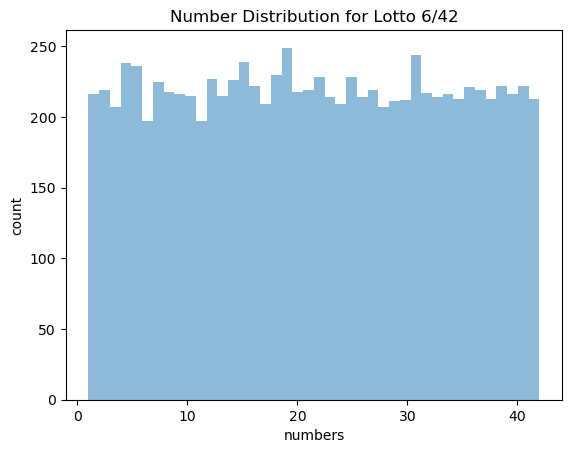

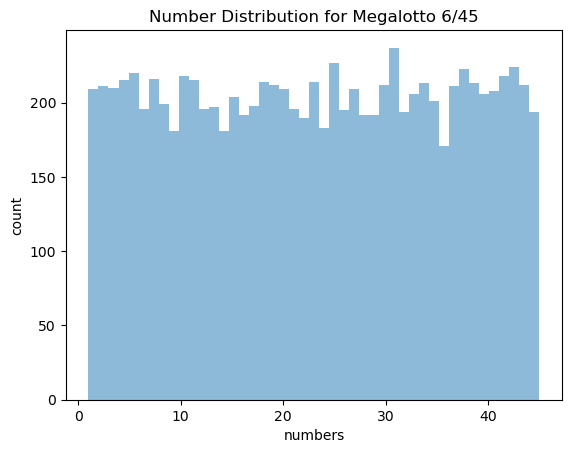

In [8]:
# Plot distribution 6/42, 6/45
read.createHist(numbers42, 42, 'Lotto 6/42')
read.createHist(numbers45, 45, 'Megalotto 6/45')

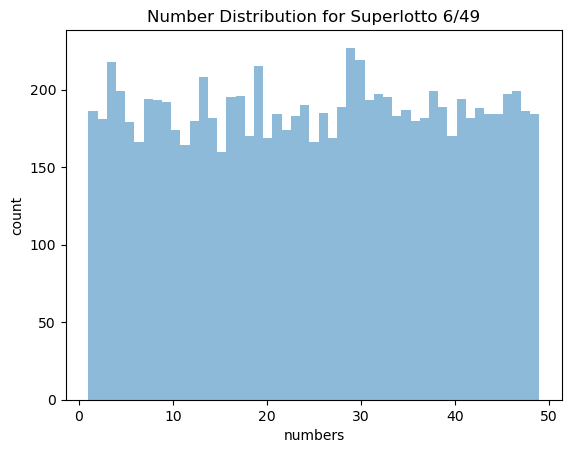

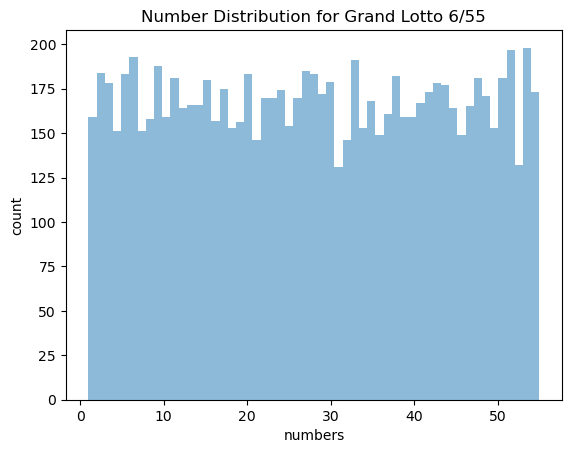

In [9]:
# Plot distribution 6/49, 6/55
read.createHist(numbers49, 49, 'Superlotto 6/49')
read.createHist(numbers55, 55, 'Grand Lotto 6/55')

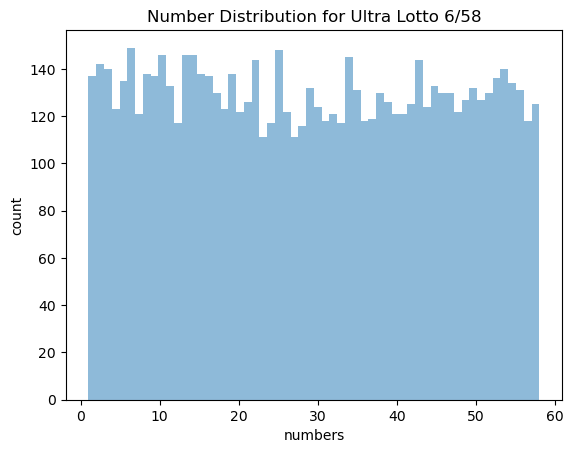

In [10]:
# Plot distribution 6/58
read.createHist(numbers58, 58, 'Ultra Lotto 6/58')

In [11]:
# Create uniform dataset for 6/55
numbers55uniform = read.createUniformData(numbers55, 55)

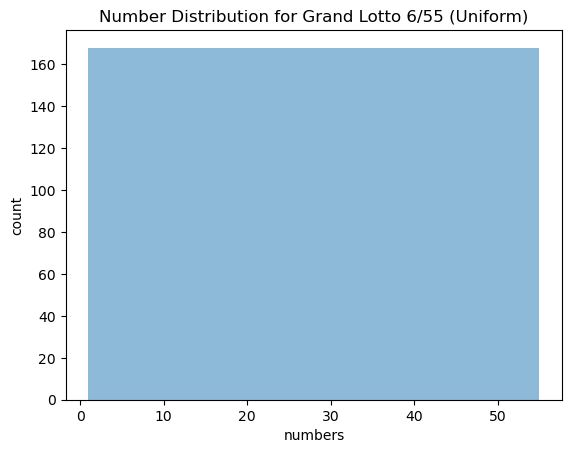

In [12]:
# Plot hypothetical uniform 6/55 distribution
read.createHist(numbers55uniform, 55, 'Grand Lotto 6/55 (Uniform)')

In [13]:
# Perform Kolmogorov-Smirnov test

"""
This test is used to compare 2 distributions if they come from the same underlying distribution.
Test statistic: max value of the difference between dataset A and B's CDF

Null hypothesis: both dataset come from the same distribution
"""

ksr55 = ks_2samp(numbers55uniform, numbers55)

print(f"Tstatistic: {ksr55[0]}")
print(f"P-value: {ksr55[1]}")

Tstatistic: 0.004837472715474013
P-value: 0.9998924157943627


## Test Interpretation (for 6/55)
Since the test statistic is small implying little deviation from the theoreticcal distribution (p value is close to 1), using a level of significance of .05 *(probability of rejecting a true null hypothesis / Type 1 Error)* we cannot reject the null hypothesis. Also, since the pvalue is very close to 1, it suggests that the two dataset is likely from the same distribution and any difference is just due to chance / randomness.

In [15]:
# Testing for other lottery types

# Creating uniform dataset
numbers42uniform = read.createUniformData(numbers42, 42)
numbers45uniform = read.createUniformData(numbers45, 45)
numbers49uniform = read.createUniformData(numbers49, 49)
numbers58uniform = read.createUniformData(numbers58, 58)

# Perform Kolmogorov-Smirnov test
ksr42 = ks_2samp(numbers42uniform, numbers42)
ksr45 = ks_2samp(numbers45uniform, numbers45)
ksr49 = ks_2samp(numbers49uniform, numbers49)
ksr58 = ks_2samp(numbers58uniform, numbers58)

In [16]:
# Tabulating Kolmogorov-Smirnov test results
lotteryTypes = ['Lotto 6/42','Megalotto 6/45','Superlotto 6/49','Grand Lotto 6/55','Ultra Lotto 6/58']
tstats = [ksr42[0], ksr45[0], ksr49[0], ksr55[0], ksr58[0]]
pvals = [ksr42[1], ksr45[1], ksr49[1], ksr55[1], ksr58[1]]

dict = {'type': lotteryTypes, 'tstatistic': tstats, 'p-value': pvals}
table = pd.DataFrame(dict)

table

,type,tstatistic,p-value
0,Lotto 6/42,0.004529,0.999977
1,Megalotto 6/45,0.006736,0.983565
2,Superlotto 6/49,0.009408,0.806255
3,Grand Lotto 6/55,0.004837,0.999892
4,Ultra Lotto 6/58,0.015161,0.347082


## Test Interpretation (Overall)
None of the lottery type is found to have a p-value less than .05, which means that we could not reject the null hypothesis that the dataset comes from a uniform distribution. We therefore cannot conclude that the lottery results deviate from the expected uniform distribution (no signs of unfairness).

## **Part 2: Analysis of the Effects of Entries Count on Draw Counts (EZ2)**
In this section, the distribution of draw counts as it relates to the number of bets will be investigated. Note that it is assumed for every draw the player has the same amount of entries.

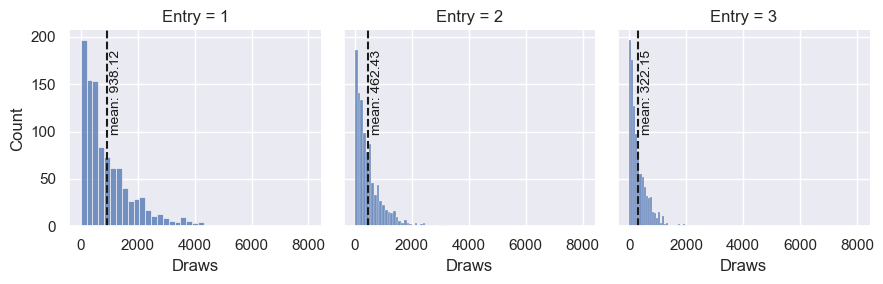

In [19]:
# Plotting effects of 1, 2 and 3 bets
numSim = 1000 # Number of draws
bet1 = lsim.gen_ez_2dist(numSim, [[1,2]])
bet2 = lsim.gen_ez_2dist(numSim, [[1,2],[3,4]])
bet3 = lsim.gen_ez_2dist(numSim, [[1,2],[3,4],[5,6]])
data = pd.concat([bet1, bet2, bet3]) # Create long form data for plotting
lsim.createDistHist(data);

As shown from the simulated draws, EZ2 lotto type (which is similar to other types) resembles a geometric distribution, which is [defined as](https://www.britannica.com/topic/geometric-distribution) "a discrete probability distribution that describes the chances of achieving success in a series of independent trials, each having two possible outcomes". This is expected by definition since for every lottery draw there are only two outcomes (get the drawn number or not).

It can be observed that increasing entries increases the probability of getting a single draw which reduces the mean amount of draws needed to get a win and also the magnitude of the right tail values (the distribution is being "condensed" with more entries/bets will equate to likely lesser draws required to get a win).

#### **Number of Distribution Statistics**
The distribution of numbers of draws are shown below. The 50% percentile or Median (which is the preferred measure of central tendency for skewed distributions since it is more robust to outliers) is lesser than the mean (since the distribution is skewed to the right) and also behave similarly with the mean (both are decreasing). The maximum observed number of draws is also found to be decreasing as entries are increased.

In [22]:
print("1 Entry")
data[data['Entry'] == 1]['Draws'].describe()

1 Entry


count    1000.000000
mean      938.115000
std       925.490335
min         1.000000
25%       283.000000
50%       612.500000
75%      1320.250000
max      8039.000000
Name: Draws, dtype: float64

In [23]:
print("2 Entries")
data[data['Entry'] == 2]['Draws'].describe()

2 Entries


count    1000.000000
mean      462.430000
std       455.004294
min         1.000000
25%       139.250000
50%       325.000000
75%       621.000000
max      3241.000000
Name: Draws, dtype: float64

In [24]:
print("3 Entries")
data[data['Entry'] == 3]['Draws'].describe()

3 Entries


count    1000.000000
mean      322.151000
std       324.160525
min         1.000000
25%        91.750000
50%       218.000000
75%       453.500000
max      2379.000000
Name: Draws, dtype: float64

#### **Note: Probability of winning EZ2**

There are 31 numbers in EZ2, where in order to win one must get two numbers exactly in order.
By multiplication rule there are 31x31 or 961 total combinations. 
So the probability of winning based on a single draw is 1/961 or ~.104%.
Two draws will be ~1/480.5 and 3 draws will be ~1/320.33. 
These values (probability of denominator) are not far to those obtained from the simulated draws (with differences due to the limited draw counts conducted in the simulation).

#### **CDF of Draw Counts**

Using the CDF for geometric distribution, for varying entries, the probability of getting less than or equal the specified draw count will be computed.

In [27]:
# Function for computing CDF of geometric distribution
def drawProb(entries, x):
    p = entries / 961
    probLessThanEqualX = 1 - pow((1 - p),x)
    return probLessThanEqualX

# Printing CDF values for 1000 draws
print(round(drawProb(1, 1000),3))
print(round(drawProb(2, 1000),3))
print(round(drawProb(3, 1000),3))

0.647
0.875
0.956


**Note:** Having a constant draw (1000 draws), as the number of entries increase the value of the cumulative probability increases (.647 for a single entry, .875 for 2 entries and .956 for 3 entries) which implies as entries increase it is less likely the specified constant draw will be exceeded.

#### **Cost Analysis of Different Entries**

Is increasing the amount of entries worth it? (considering only the cost of tickets and prize from winning). To determine the most valuable number of entries, The average of the prize minus the total betting cost will be computed and compared for 1, 2, 3 entries. It is assumed a single ticket is worth 10 pesos and the prize for winning is 4000 pesos.

In [30]:
dataCopy = data.copy(deep=True)
dataCopy['Return'] = 4000 - (dataCopy['Draws'] * dataCopy['Entry'] * 10)

In [31]:
print("Expected return per entry")
print(f"1 Entries: {dataCopy[dataCopy['Entry'] == 1]['Return'].describe()['mean']}")
print(f"2 Entries: {dataCopy[dataCopy['Entry'] == 2]['Return'].describe()['mean']}")
print(f"3 Entries: {dataCopy[dataCopy['Entry'] == 3]['Return'].describe()['mean']}")

Expected return per entry
1 Entries: -5381.15
2 Entries: -5248.6
3 Entries: -5664.53


From the expected returns , it can be observed that all entries has a negative return , meaning that on average you will expect a loss when playing the lottery. The return is also similar, where the differences is likely due to the variability of the sample. There is no advantage of betting more entries per draw with the returns as basis.

## **Part 3: Winners / Winnings Descriptive Statistics**
In this section, some questions pertaining to winners and winnings will be answered.

In [34]:
# Preprocessing for SQL queries in Part 3

# Renaming Jackpot (for simpler querying)
df.rename(columns = {'JACKPOT (PHP)':'JACKPOT'}, inplace = True)

# Drop 'COMBINATIONS' column to avoid pandaSQL querying error (List is an unsupported type)
df = df.drop(['COMBINATIONS'], axis=1) 

# Convert winners to floating (for operations in SQL queries)
df['WINNERS'] = df['WINNERS'].astype(float)

### **Q1: How many total winners (per Lotto Type)?**

In [36]:
# How many total winners (per Lotto Type)
query = """SELECT [LOTTO GAME], CAST(SUM(WINNERS) AS INT) AS 'TOTAL WINNERS' FROM df 
         GROUP BY [LOTTO GAME] """
df1 = ps.sqldf(query,locals())
df1

,LOTTO GAME,TOTAL WINNERS
0,2D Lotto 2PM,702342
1,2D Lotto 5PM,616019
2,2D Lotto 9PM,1455648
3,3D Lotto 2PM,1562884
4,3D Lotto 5PM,1411507
5,3D Lotto 9PM,2178902
6,4D Lotto,44636
7,6D Lotto,244
8,Grand Lotto 6/55,507
9,Lotto 6/42,229


2D/3D/4D Lotto as expected have more total winners compared to 6 digit lotto types (6/42, 6/45, 6/49, 6/55/, 6/58). Also as expected, the 6 digit lotto types tend to have a decreasing winner count as the denominator or total number being drawn increases except for 6/55 which has an increase in winner count compared to 6/49.

### **Q2: How many winners per game (per Lotto Type)?**

In [39]:
# How many winners per game (per Lotto Type)

# SubQuery: How many total winners (per Lotto Type) - same query as previous cell (but without casting SUM as INT)
query1 = """SELECT [LOTTO GAME], SUM(WINNERS) AS 'TOTAL WINNERS' FROM df 
            GROUP BY [LOTTO GAME] """
# SubQuery: How many total game (per Lotto Type) - same as previous
query2 = """ SELECT [LOTTO GAME], COUNT([LOTTO GAME]) AS 'TOTAL GAMES' FROM df 
            GROUP BY [LOTTO GAME]"""
df1 = ps.sqldf(query1,locals())
df2 = ps.sqldf(query2,locals())

# Main query
query3 = """ SELECT df1.[LOTTO GAME], ROUND([TOTAL WINNERS]/[TOTAL GAMES],3) AS 'WINNERS PER GAME' FROM df1
            JOIN df2 ON df1.[LOTTO GAME] = df2.[LOTTO GAME]
        """
df3 = ps.sqldf(query3,locals())
df3

,LOTTO GAME,WINNERS PER GAME
0,2D Lotto 2PM,197.899
1,2D Lotto 5PM,173.624
2,2D Lotto 9PM,410.273
3,3D Lotto 2PM,440.373
4,3D Lotto 5PM,397.832
5,3D Lotto 9PM,614.121
6,4D Lotto,30.262
7,6D Lotto,0.166
8,Grand Lotto 6/55,0.329
9,Lotto 6/42,0.149


It can be observed that 3D Lotto has more winners per game than 2D Lotto (which could be associated with number of bets placed or difference in probability of getting a draw). Also it can be observed that, 6 digit lotto types has a decreasing trend, except for 6/55 which has an increase from 6/49.

### **Q3: What is the historical maximum prize per lotto type?**

In [42]:
# Maximum prize per lotto type
query = """ SELECT [LOTTO GAME], MAX(JACKPOT) FROM df
            GROUP BY [LOTTO GAME]
        """
df1 = ps.sqldf(query,locals())
pd.options.display.float_format = '{:.0f}'.format
df1

,LOTTO GAME,MAX(JACKPOT)
0,2D Lotto 2PM,4000
1,2D Lotto 5PM,4000
2,2D Lotto 9PM,4000
3,3D Lotto 2PM,4500
4,3D Lotto 5PM,4500
5,3D Lotto 9PM,4500
6,4D Lotto,494575
7,6D Lotto,13725184
8,Grand Lotto 6/55,698806269
9,Lotto 6/42,111998556


There's an increasing trend in max jackpot for 6 digit lotto type. For 6/58, it even reached the billionth peso mark which was won October 14 2018, split by 2 lucky winners.

### **Q4: What is the average winning per winners? (6/42, 6/45, 6/49, 6/55, 6/58)**

In [45]:
# Average winning per winners 
query = """ SELECT [LOTTO GAME], SUM(JACKPOT)/SUM(WINNERS) AS "AVERAGE PRIZE PER WINNER"
            FROM df
            WHERE WINNERS > 0
            AND [LOTTO GAME] IN 
            ('Grand Lotto 6/55','Lotto 6/42','Megalotto 6/45',
            'Superlotto 6/49','Ultra Lotto 6/58')
            GROUP BY [LOTTO GAME]
        """
df1 = ps.sqldf(query,locals())
df1

,LOTTO GAME,AVERAGE PRIZE PER WINNER
0,Grand Lotto 6/55,14659055
1,Lotto 6/42,21978422
2,Megalotto 6/45,35520447
3,Superlotto 6/49,62180742
4,Ultra Lotto 6/58,159100429


It can be observed that the lowest average prize is from the 6/55 Lotto. The reason for this is not due to the prize but due to the amount of winners (which will be answered in the next question).

### **Q5: How many lottery winners per year? (per Lotto Type)**

In [48]:
# Winner per year
df1 = df.groupby([df["DRAW DATE"].dt.year, df['LOTTO GAME']])['WINNERS'].sum()
# Printing all results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(df1)

DRAW DATE  LOTTO GAME      
2014       2D Lotto 2PM        63607
           2D Lotto 5PM        59612
           2D Lotto 9PM       146613
           3D Lotto 2PM       201123
           3D Lotto 5PM       198190
           3D Lotto 9PM       284736
           4D Lotto             5295
           6D Lotto               21
           Grand Lotto 6/55        7
           Lotto 6/42             28
           Megalotto 6/45         20
           Superlotto 6/49        13
2015       2D Lotto 2PM        64166
           2D Lotto 5PM        62647
           2D Lotto 9PM       159533
           3D Lotto 2PM       197800
           3D Lotto 5PM       199862
           3D Lotto 9PM       296483
           4D Lotto             4815
           6D Lotto               24
           Grand Lotto 6/55        8
           Lotto 6/42             17
           Megalotto 6/45         23
           Superlotto 6/49        11
           Ultra Lotto 6/58        2
2016       2D Lotto 2PM        72223
          

<Axes: xlabel='LOTTO GAME', ylabel='WINNERS'>

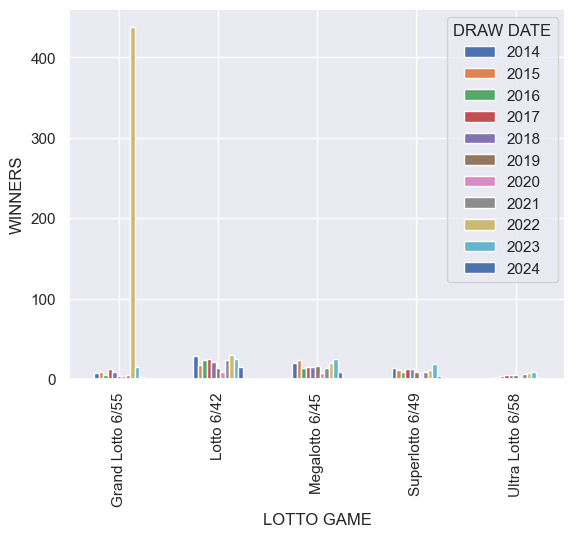

In [49]:
# Plotting data (excluding 2D/3D/4D Lotto) 

# Reshaping grouped data
df2 = df1.reset_index()
# Source: https://stackoverflow.com/questions/53811565/plotting-pandas-dataframe-from-pivot
excludeList = ['2D Lotto 2PM', '2D Lotto 5PM', '2D Lotto 9PM', '3D Lotto 2PM', '3D Lotto 5PM', '3D Lotto 9PM', '4D Lotto', '6D Lotto']
df2 = df2[df2['LOTTO GAME'].isin(excludeList) == False]
df2 = df2.pivot(index='DRAW DATE', columns='LOTTO GAME', values='WINNERS')
# df2.plot();

df2.T.plot(kind='bar', ylabel='WINNERS')

It can be observed that there is an anomaly in the Grand Lotto 6/55 during 2022 with an observed 433 winners in one draw. The pattern of the said draw contains multiples of 9 (09-45-36-27-18-54) which is said by PCSO to be a common combination among betters.

SOURCE: https://www.rappler.com/nation/pcso-says-grand-lotto-winners-october-1-2022-loyal-numbers/

<Axes: xlabel='LOTTO GAME', ylabel='WINNERS'>

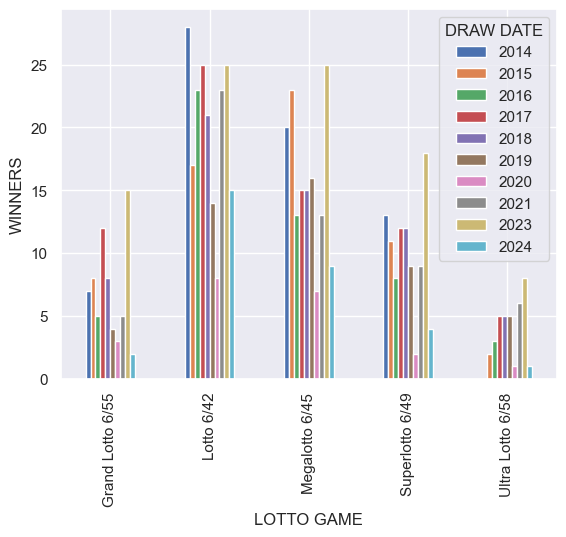

In [51]:
# Dropping 2022 data and then plotting (for magnification of data)

df2 = df2.drop(index = 2022, errors='ignore')
df2.T.plot(kind='bar', ylabel='WINNERS')

The plot above shows the data after removing year 2022. Trend of winners is expected, where lotto types with greater denominator have less winners. There is also a notable observed drop in winners for all types in 2020, which could be due to the pandemic lockdowns so it was difficult to participate. 

### **Q6: Which month has the most number of winners? (6/55)**

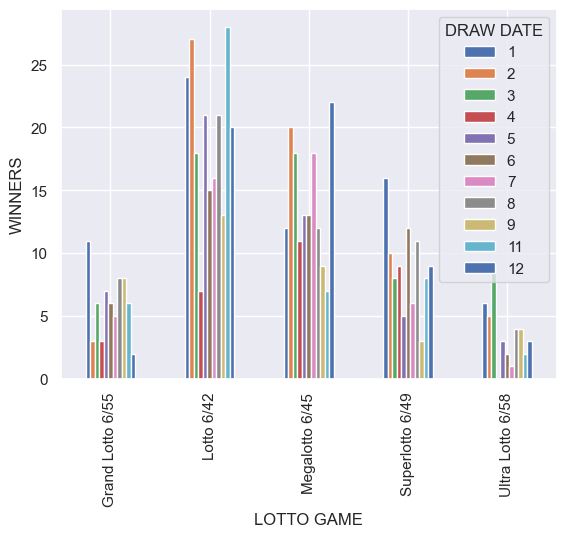

In [54]:
# Winner per month
df1 = df.groupby([df["DRAW DATE"].dt.month, df['LOTTO GAME']])['WINNERS'].sum()

# Plotting data (excluding 2D/3D/4D Lotto) 
# Reshaping grouped data
df2 = df1.reset_index()
# Source: https://stackoverflow.com/questions/53811565/plotting-pandas-dataframe-from-pivot
excludeList = ['2D Lotto 2PM', '2D Lotto 5PM', '2D Lotto 9PM', '3D Lotto 2PM', '3D Lotto 5PM', '3D Lotto 9PM', '4D Lotto', '6D Lotto']
df2 = df2[df2['LOTTO GAME'].isin(excludeList) == False]
df2 = df2.pivot(index='DRAW DATE', columns='LOTTO GAME', values='WINNERS')

# Dropping October data - which contains the anomaly draw
df2 = df2.drop(index = 10, errors='ignore')
df2.T.plot(kind='bar', ylabel='WINNERS');

The implication of looking for monthly patterns is that one can hypothesize that there are certain months where there are more people placing bets (to which it can be assumed there are proportionally more winners). This hypothesis can be confirmed using the actual data from PCSO if available.

Excluding October (containing the anomaly 433 winner draw), from the plot of the aggregated winners per month there is no obvious common pattern / trend for the different lottery types.